In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import keras

## Reading a FITS file

In [43]:
img_path = '/home/viviane/BLF_training/Images/EUC_J/imageEUC_J-200001.fits'
fits.info(img_path)

Filename: /home/viviane/BLF_training/Images/EUC_J/imageEUC_J-200001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   (66, 66)   float32   


In [36]:
### using fits.getdata() --> np array
img_data = fits.getdata(img_path, ext=0)
print(img_data)

[[-9.76715930e-12  5.15664941e-12  1.09206437e-11 ... -5.59254899e-12
  -3.11408560e-12  4.89244192e-12]
 [-1.53540358e-11  1.29798325e-11 -2.45361175e-12 ...  7.96089583e-12
  -1.83813902e-11 -2.78579763e-12]
 [ 1.88017896e-12  9.41518478e-12  6.43359443e-13 ...  9.76120226e-13
   5.17626610e-12 -4.57186676e-12]
 ...
 [-6.50529934e-12  1.61818284e-11  7.76066971e-12 ... -5.27057131e-12
   5.44669128e-12  9.69319460e-13]
 [ 1.20240528e-11 -1.82952351e-12  2.04764972e-11 ...  1.14301635e-12
   1.23559182e-12 -1.11187286e-12]
 [ 2.80688558e-12 -8.62631754e-12  4.48427536e-12 ...  4.49563910e-12
   4.55615884e-12  3.62280019e-12]]


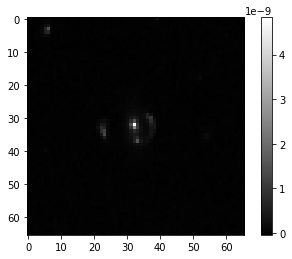

In [38]:
plt.figure()
plt.imshow(img_data, cmap='gray')
plt.colorbar()

In [55]:
# or using fits.open()  --> HDU object
hdul = fits.open(img_path)
img_data2 = hdul[0].data  # nparray
hdul[0].header
#hdul.close()

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                   66 / length of data axis 1                          
NAXIS2  =                   66 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
WCSAXES =                    2 / number of World Coordinate System axes         
CRPIX1  =                 33.5 / x-coordinate of reference pixel                
CRPIX2  =                 33.5 / y-coordinate of reference pixel                
CRVAL1  =                   0. / first axis value at reference pixel            
CRVAL2  =                   

In [155]:
def get_data():
    
    blf = pd.read_csv('blf_train.csv')

    imgs = []
    for path in blf['img_path_H']:
        img_data = fits.getdata(path, ext=0)  # np array
        #img_data *= 1/img_data.max()
        imgs.append(img_data)
    imgs = np.array(imgs)

    labels = np.array(blf_train['n_sources'])
    
    return imgs, labels

In [161]:
imgs, labels = get_data()
print(imgs[75].min())
print(imgs[75].max())

-2.4679868e-11
3.2557987e-09
